In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [119]:
def fixdate(col):
    return [datetime.datetime(int(date[6:10]), int(date[0:2]), int(date[3:5]), 
                              int(date[11:13]), int(date[14:16]), int(date[17:19])) for date in col]

In [120]:
df = pd.read_csv("C:/Users/20175552/Downloads/waterschap-aa-en-maas_sewage_2019/sewer_data/data_pump/DB_Niveaumetingen_2018_2019.csv")

In [121]:
df.columns = df.iloc[0]
df.drop(0, inplace=True)

In [122]:
df.head()

,TimeStamp,Time Zone,GBS_DB.RG8110/LT610/Niveaumeting.Q,GBS_DB.RG8120/LT610/Niveaumeting.Q,GBS_DB.RG8130/LT610/Niveaumeting.Q,GBS_DB.RG8140/LT610/Niveaumeting.Q,GBS_DB.RG8150/LT610/Niveaumeting.Q,GBS_DB.RG8160/LT610/Niveaumeting.Q,GBS_DB.RG8170/LT610/Niveaumeting.Q,GBS_DB.RG8180/LT610/Niveaumeting.Q
1,01-01-18 16:51:39,GMT+1.0,-2.44,-0.75,-1.26,-3.06,-0.92,-2.27,-1.82,0.27
2,01-01-18 21:34:21,GMT+1.0,-2.44,1.25,-0.23,-0.09,0.51,-1.66,-1.13,-0.11
3,01-02-18 02:17:03,GMT+1.0,-2.26,-1.01,-1.21,-2.23,0.37,-1.81,-1.53,0.44
4,01-02-18 06:59:45,GMT+1.0,-2.36,-0.99,-1.19,-2.94,0.13,-2.06,-2.46,-0.05
5,01-02-18 11:42:27,GMT+1.0,-2.51,-1.06,-1.18,-3.21,-0.71,-2.24,-1.68,0.41


In [123]:
df.columns = ['TimeStamp', 'Time Zone', 'RG810', 'RG8120','RG8130','RG8140','RG8150','RG8160','RG8170','RG8180']

In [124]:
df2 = df.replace("<Bad Data>", np.nan)

In [125]:
df2.iloc[445, 3] == "<Bad Data>"

False

In [126]:
df2 = df2.astype({'RG810': float, 'RG8120': float,'RG8130': float,'RG8140': float,'RG8150': float,
                  'RG8160': float,'RG8170': float,'RG8180': float})

In [138]:
df2["newstamp"] = df2["TimeStamp"].str[:6] + "20" + df2["TimeStamp"].str[6:]
df2["TimeStamp_new"] = fixdate(df2["newstamp"])
df2 = df2.sort_values("TimeStamp_new")

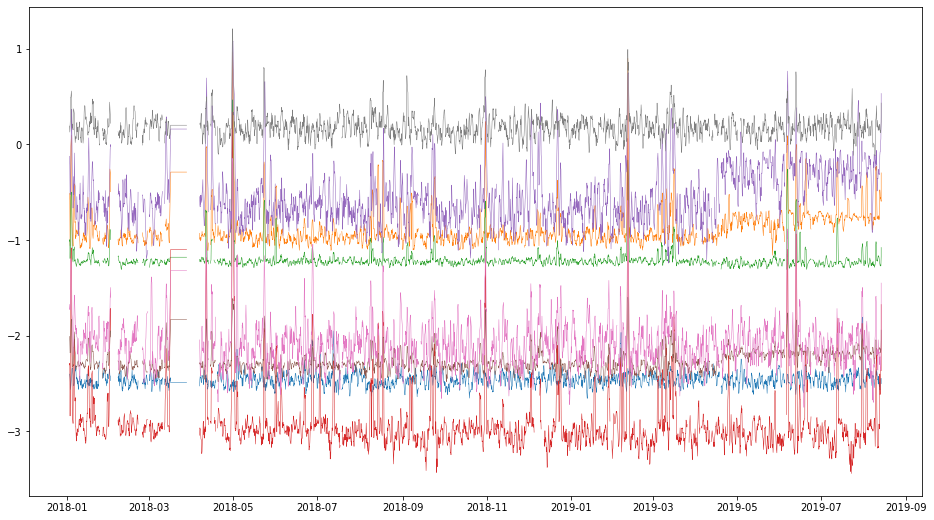

In [139]:
plt.figure(figsize = (16,9))
plt.plot(df2["TimeStamp_new"],df2[['RG810', 'RG8120','RG8130','RG8140','RG8150','RG8160','RG8170','RG8180']].rolling(window=len(df)//(19*(365//12))).mean(), linewidth=0.5)